# Iris-Dataset
Das Iris-Dataset ist ein Multiclass-Classification Problem. Der Datensatz ist an sich sehr klein und hat folgendemögliche Feature:
* Kelchblatt(sepal)
    * Sepal leght 
    * Sepal width
* Blütenblatt(petal)
    * petal leght 
    * petal width
* Class = Target
    * es gibt drei klassen an IRIS Spezien, die vorhergesagt werden sollen<br>
    
der Datensatz kommt ohne Spaltennamen (featurename) => ich muss diese aus der Description auslesen und anwenden. 

## Source
Die Ausgangsdaten können  [hier](https://archive.ics.uci.edu/ml/datasets/Iris) manuell heruntergleaden werden. Diese sind werden im nächsten Schritt automatisch heruntergeladen

## Daten herunterladen ([BSP](https://github.com/JHC90/Basic-DataScience-Skills/blob/master/0_DatenBeschaffung-Download.ipynb))

In [61]:
import requests
print('Download Starting...')
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data' # => Checken ob die Datei bereits vorliegt oder nicht
r = requests.get(url)
filename = "./data/iris.data"
with open(filename,'wb') as output_file:
    output_file.write(r.content)
print('Download Completed!!!')

Download Starting...
Download Completed!!!


## Daten einelesen ([BSP](https://github.com/JHC90/Basic-DataScience-Skills/blob/master/1_DatenEinlesen.ipynb))
https://github.com/JHC90/Basic-DataScience-Skills/blob/master/1_DatenEinlesen.ipynb

In [2]:
import pandas as pd
df=pd.read_csv('./data/iris.data',delimiter=',',encoding='utf-8')
print(df)

     5.1  3.5  1.4  0.2     Iris-setosa
0    4.9  3.0  1.4  0.2     Iris-setosa
1    4.7  3.2  1.3  0.2     Iris-setosa
2    4.6  3.1  1.5  0.2     Iris-setosa
3    5.0  3.6  1.4  0.2     Iris-setosa
4    5.4  3.9  1.7  0.4     Iris-setosa
..   ...  ...  ...  ...             ...
144  6.7  3.0  5.2  2.3  Iris-virginica
145  6.3  2.5  5.0  1.9  Iris-virginica
146  6.5  3.0  5.2  2.0  Iris-virginica
147  6.2  3.4  5.4  2.3  Iris-virginica
148  5.9  3.0  5.1  1.8  Iris-virginica

[149 rows x 5 columns]


In [62]:
# Add the column names, kommt von der Description
df.columns = ['lengthSepal','widthSepal','lengthPetal','widthPetal','art']
print(df)

     lengthSepal  widthSepal  lengthPetal  widthPetal             art
0            4.9         3.0          1.4         0.2     Iris-setosa
1            4.7         3.2          1.3         0.2     Iris-setosa
2            4.6         3.1          1.5         0.2     Iris-setosa
3            5.0         3.6          1.4         0.2     Iris-setosa
4            5.4         3.9          1.7         0.4     Iris-setosa
..           ...         ...          ...         ...             ...
144          6.7         3.0          5.2         2.3  Iris-virginica
145          6.3         2.5          5.0         1.9  Iris-virginica
146          6.5         3.0          5.2         2.0  Iris-virginica
147          6.2         3.4          5.4         2.3  Iris-virginica
148          5.9         3.0          5.1         1.8  Iris-virginica

[146 rows x 5 columns]


In [63]:
# neues df mit den Titles

## Check for NA & possible NA Vlaues

In [64]:
# Suchen nach möglichen Platzhalter für NA & ersetzen möglicher NA-Werte
df.isna().any()
df.isin([" "]).any()
#df = df.replace(" ", np.nan)
df.isin(["?"]).any()
#df = df.replace("?", np.nan)

lengthSepal    False
widthSepal     False
lengthPetal    False
widthPetal     False
art            False
dtype: bool

## Check-DF

In [65]:
# df.head() # 
# print(df.shape) # (149, 5)
# df.isna().any() # False
# df.isna().any().any() # False

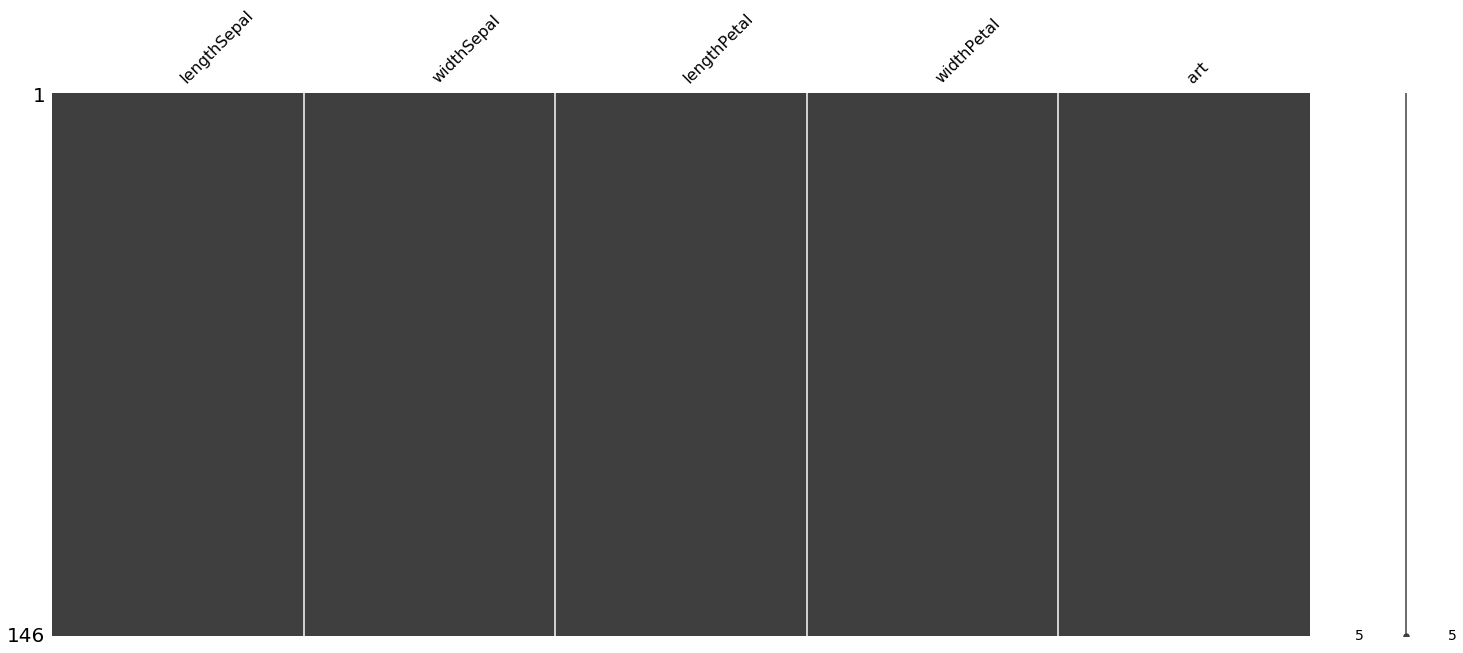

In [66]:
import missingno as msno
msno.matrix(df)

Auf basis der oberen Grafik wirk es nicht als gäbe es NA-Werte, das muss aber noch nicht notgedrungen stimmen, es kann sein dass für ein NA ein Platzhalter verwendet wurde, dass muss nun mnauell geprüft werden. Es wirkt aber auch so als müssten keine Werte imputet werden

In [67]:
df.describe()# Aufschluss ob Scaling oder nicht

,lengthSepal,widthSepal,lengthPetal,widthPetal
count,146.000000,146.000000,146.000000,146.000000
mean,5.861644,3.052740,3.796575,1.215753
std,0.829562,0.436948,1.753987,0.755822
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [68]:
df.info() # Aufschluss welcher Datentyp, ob Null werte
#df.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 148
Data columns (total 5 columns):
lengthSepal    146 non-null float64
widthSepal     146 non-null float64
lengthPetal    146 non-null float64
widthPetal     146 non-null float64
art            146 non-null object
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


Das Feature "class" wird wsl als OHE bzw DummyEncondign geändert werden. 

In [69]:
# Checkout the duplicates and remove them
print(df.shape)
df = df[~df.duplicated()] # remove duplicates
print(df.shape)

(146, 5)
(146, 5)


## EDA ([BSP](https://github.com/JHC90/Basic-DataScience-Skills/blob/master/1_EDA-Examples.ipynb))

### Data-Split ([BSP](https://github.com/JHC90/Basic-DataScience-Skills/blob/master/0_SplitDataByDataType.ipynb))

Welche Methoder der EDA verwendet wird hängt von dem jeweiligen Datenypt ab. 

In [70]:
# Split in Categorical und Numerical Features
categorical_features = df.select_dtypes(include=['object']) #=> resultat df
numerical_features = df.select_dtypes(include=['float64', 'int64']) #=> resultat df
#print(categorical_features.columns)
#print(numerical_features.columns)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025FECB48E80>,
      dtype=object)

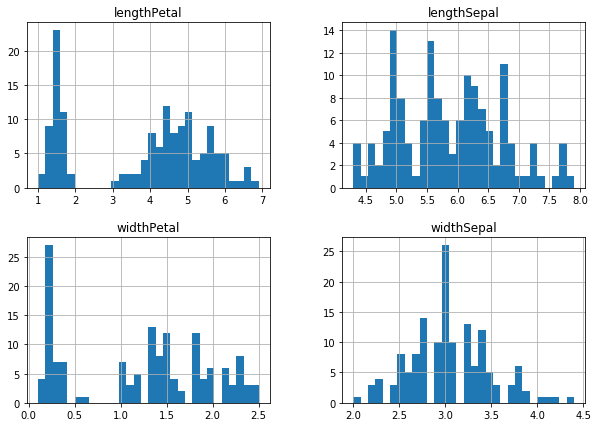

In [71]:
numerical_features.hist(bins=30, figsize=(10, 7))

## Boxplots um die Datenverteilung zu verstehen
Abhängig hiervon wird im Preprocessing dann die Skalierung gemacht oder eben nicht

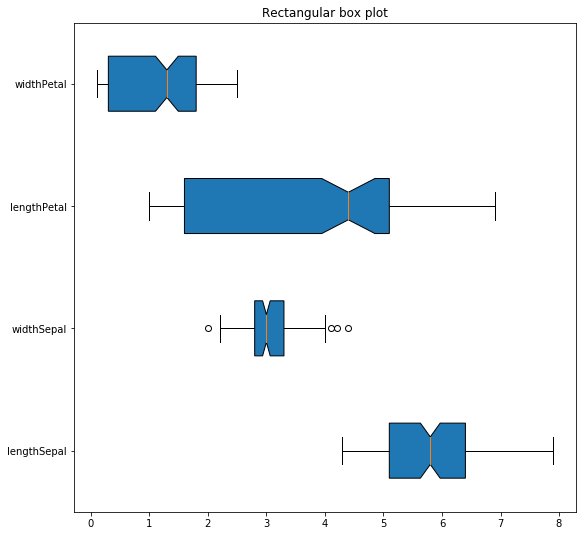

In [72]:
import matplotlib.pyplot as plt
all_data = numerical_features.to_numpy()
labels = numerical_features.columns
fig, axs = plt.subplots( figsize=(9, 9))
#fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4)) # ist für die darstellung von beiden Boxplots verantwortlich

# rectangular box plot
plot1 = axs.boxplot(all_data,
                         vert=False,  # vertical box alignment
                            notch=True,
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks
axs.set_title('Rectangular box plot')


colors = ['pink', 'lightblue', 'lightgreen']


es gibt überwiegend bei widthSepal Outlier

# Violin Plots 
Ebenfalls für die Outlier-Detection, nachdem der Boxblot lediglich auf wdith Sepal verweist schau ich nur diesen an.

In [73]:
import plotly.express as px
#df = px.data.tips()

fig3 = px.violin(df, y="widthSepal")
fig3.show()

In [74]:
fig = px.violin(df, y="widthSepal", box=True, # draw box plot inside the violin
                points='all', # can be 'outliers', or False
               )
fig.show()

In [93]:
# Violinplot per Feature

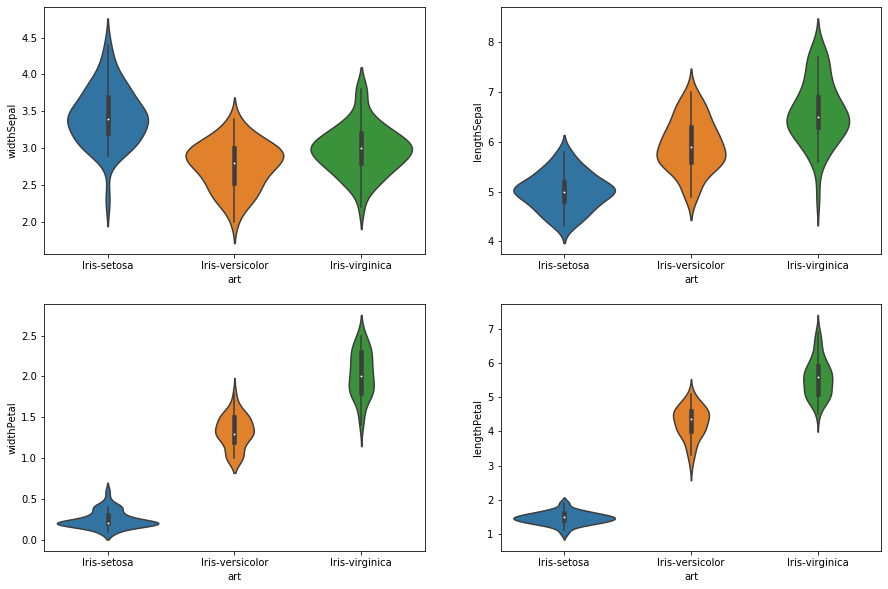

In [94]:
import seaborn as sns
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='art',y='widthSepal',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='art',y='lengthSepal',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='art',y='widthPetal',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='art',y='lengthPetal',data=df)

In [75]:
# Scatterplots für das IRIS

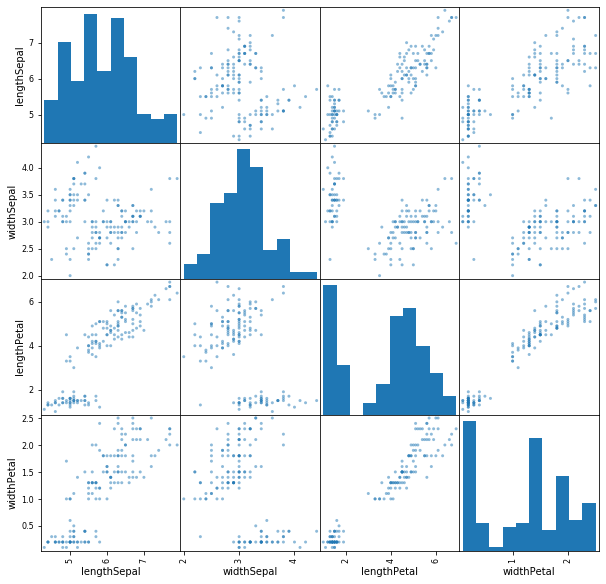

In [76]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(10, 10))
plt.show()

In [77]:
## Categorical EDA


C:\Users\1810837475\.conda\envs\Kompensationsarbeit\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

`Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.



Text(0.5, 1.0, 'Arten und deren Vereitlung')

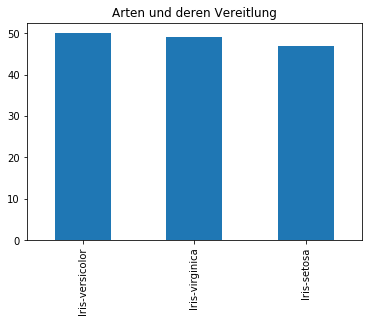

In [84]:
df['art'].value_counts().plot('bar').set_title('Arten und deren Vereitlung')


In [ ]:
# Korrelationen

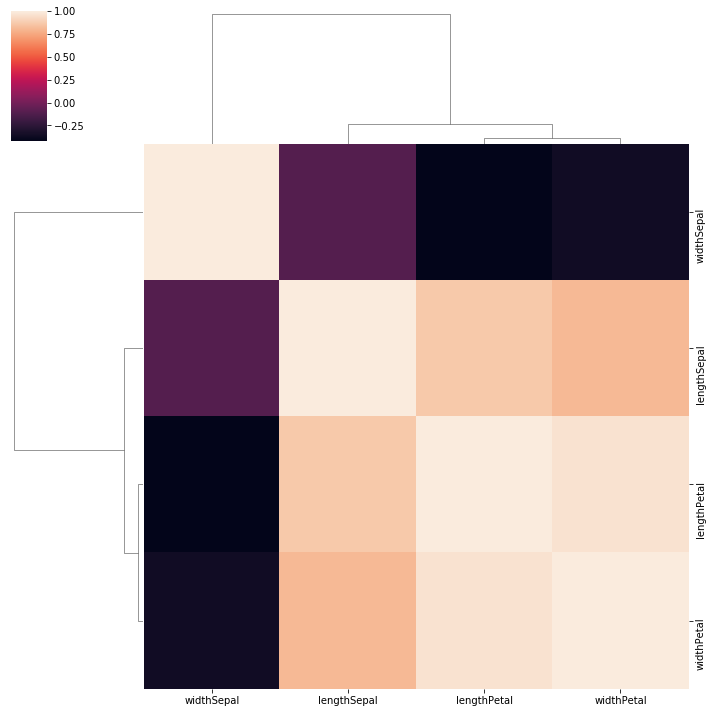

In [85]:
import seaborn as sns
sns.clustermap(df.corr())

In [ ]:
Check relationship zwischen  

In [86]:
print(df)

     lengthSepal  widthSepal  lengthPetal  widthPetal             art
0            4.9         3.0          1.4         0.2     Iris-setosa
1            4.7         3.2          1.3         0.2     Iris-setosa
2            4.6         3.1          1.5         0.2     Iris-setosa
3            5.0         3.6          1.4         0.2     Iris-setosa
4            5.4         3.9          1.7         0.4     Iris-setosa
..           ...         ...          ...         ...             ...
144          6.7         3.0          5.2         2.3  Iris-virginica
145          6.3         2.5          5.0         1.9  Iris-virginica
146          6.5         3.0          5.2         2.0  Iris-virginica
147          6.2         3.4          5.4         2.3  Iris-virginica
148          5.9         3.0          5.1         1.8  Iris-virginica

[146 rows x 5 columns]


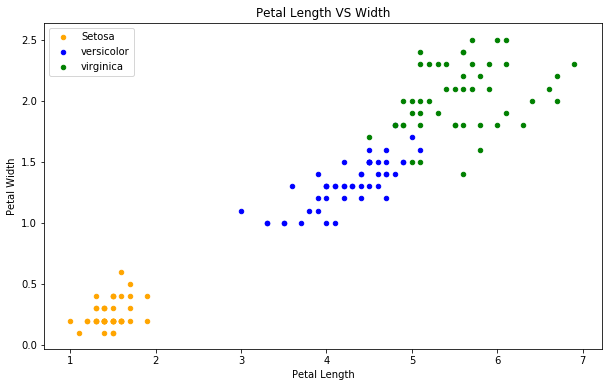

In [92]:
fig = df[df.art=='Iris-setosa'].plot(kind='scatter',x='lengthPetal',y='widthPetal',color='orange', label='Setosa')
df[df.art=='Iris-versicolor'].plot(kind='scatter',x='lengthPetal',y='widthPetal',color='blue', label='versicolor',ax=fig)
df[df.art=='Iris-virginica'].plot(kind='scatter',x='lengthPetal',y='widthPetal',color='green', label='virginica', ax=fig)

fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title("Petal Length VS Width")

fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

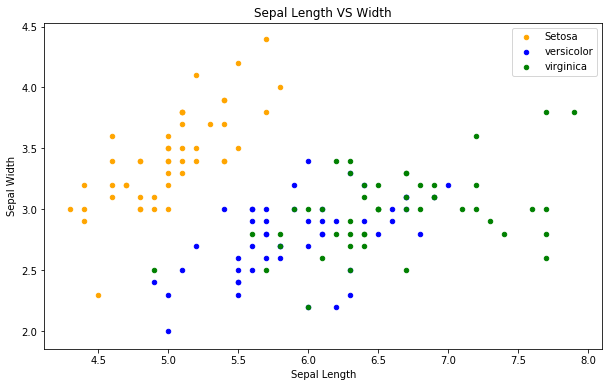

In [89]:
fig = df[df.art=='Iris-setosa'].plot(kind='scatter',x='lengthSepal',y='widthSepal',color='orange', label='Setosa')
df[df.art=='Iris-versicolor'].plot(kind='scatter',x='lengthSepal',y='widthSepal',color='blue', label='versicolor',ax=fig)
df[df.art=='Iris-virginica'].plot(kind='scatter',x='lengthSepal',y='widthSepal',color='green', label='virginica', ax=fig)

fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")

fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

# Data Prepreprocessing
Normalerweise würde ich an dieser Stelle sowohl die Imputation als auch die Skalierung vornhmen. Das gibt aber nur Sinn, das wird aber in diesem Teilbereich nicht gemacht.
Außerdem kann an dieser Stelle gut mit Pipelines gearbeitet werden. 

## Splits

In [98]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.3, random_state=300490)
print(train.shape)
print(test.shape)

(102, 5)
(44, 5)


In [99]:
train_X = train[['lengthSepal','widthSepal','lengthPetal','widthPetal']]# taking the training data features
train_y=train.art# output of our training data
test_X= test[['lengthSepal','widthSepal','lengthPetal','widthPetal']] # taking test data features
test_y =test.art   #output value of test data

# Modellierung Multiclass-Classification
Verwende die Algorithmen der [Multiclass-Classification](https://github.com/JHC90/Basic-DataScience-Skills)

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics #for checking the model accuracy
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 0.9772727272727273


C:\Users\1810837475\.conda\envs\Kompensationsarbeit\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

